In [97]:
import pandas as pd
from pyspec.plot.plot_mass_spectrum import plot_head_to_tail_mass_spectra

from lcb.cisvis.identify import identify_compound
%matplotlib inline
from cisclient.client import CISClient
from lcb.cisvis.spectra import generate_similarity_plot, generate_spectra_plot, to_dataframe, generate_histogram_intensity, \
    generate_histogram_accurate_mass, generate_histogram_ri, generate_similarity_histogram, generate_head_tail_plot

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]


In [98]:
# these are parameterized over papermill
cis_url = 'https://dev-api.metabolomics.us/cis'
cis_api_token = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'
splash = 'splash10-0002-0900000000-2b30ae8ad5903c05f1c5'
splash = 'splash10-000i-4319000000-5096d15ff351b6e6d1f3'
splash = 'splash10-0072-9800000000-dc59f2b520f6c6627ac1'
splash = 'splash10-0006-0900000000-10e6c9dfce2e974647a0'
splash = 'splash10-000i-4319000000-5096d15ff351b6e6d1f3'
library = 'soqe[M-H] | QExactive | test | negative'
library = 'soqe[M+H][M+NH4] | QExactive | test | positive'

In [99]:

client =  CISClient(cis_url, cis_api_token)
compound = client.get_compound(library=library,splash=splash)
members = list( map(lambda member: client.get_compound(library=library,splash=member),client.get_members(library=library,splash=splash)))

# Compound Generation report

Welcome to the compound generation overview report. The main purpose is to help you diagnose the generation of compounds as well as get a better understanding why it was generated in the first place.

In [100]:
to_dataframe([compound]).drop(['spectrum','ms_level','required_for_correction','inchi_key','splash','unique_mass'],axis=1)

,id,accurate_mass,target_type,matrix,method,retention_index,sample,name,precursor_mass
0,939342,688.530151,CONFIRMED_CONSENSUS,,soqe[M+H][M+NH4] | QExactive | test | positive,342.200405,consensus spectrum from 4 samples,unknown_688.5302_342.2004,688.530151


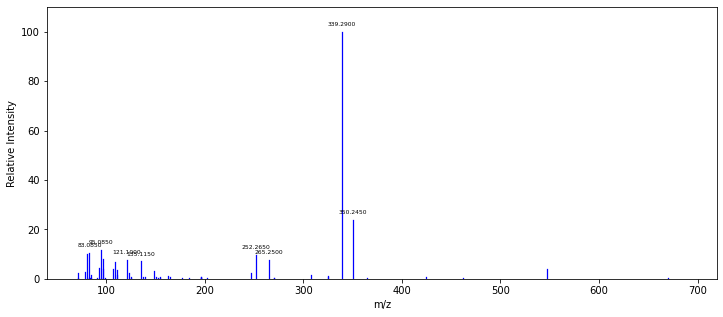

In [101]:
generate_spectra_plot(compound=compound)

This is a histogram plot of the retention index of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

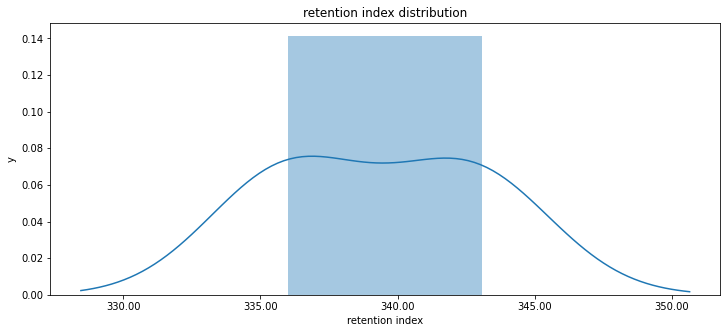

In [102]:
generate_histogram_ri(members)

This is a histogram plot of the accurate mass of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

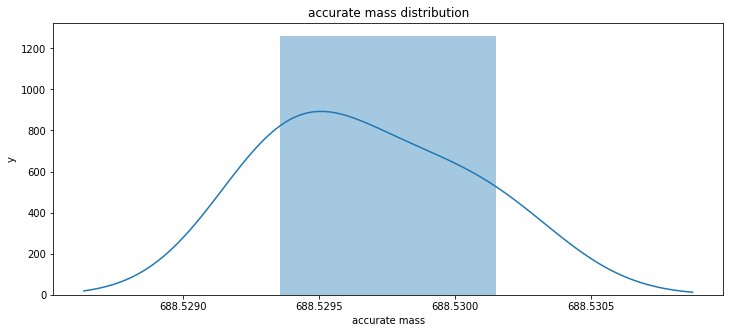

In [103]:
generate_histogram_accurate_mass(members)

This is a histogram plot of the basepeak intensity of all the members making up this compound. There are no related settings which affect this, except for
for a required min intensity setting for the Pre Cursor Mass.

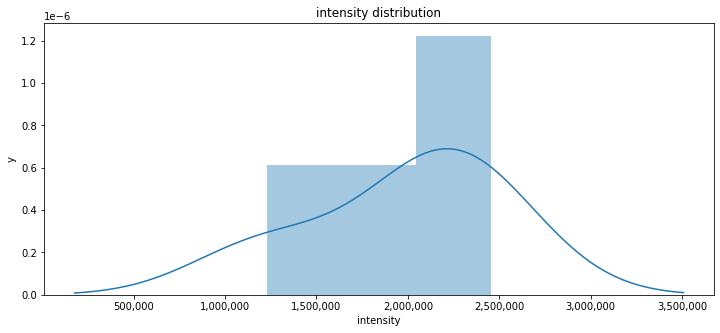

In [104]:
generate_histogram_intensity(members)

This plot demonstrates a similarity plot of all spectra making up this compond against each other. The purpose is mostly for diagnostics and finetuning of settings as well as discovering possible outliers.

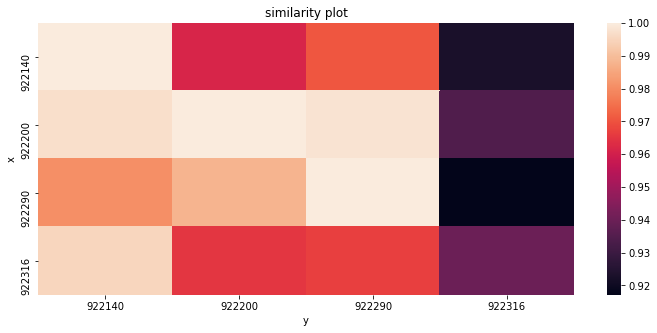

In [105]:
generate_similarity_plot(members)

This is a tabular representation of all members of this compound, with their most important properties.

In [106]:
to_dataframe(members).drop(['accurate_mass','spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)

,id,matrix,retention_index,sample,precursor_mass
0,922316,,342.200405,NIH_Lip_Std_CSH_POS_Liver_02,688.530151
1,922290,,336.043839,NIH_Lip_Std_CSH_POS_Liver_02,688.529785
2,922140,,343.088238,NIH_Lip_Std_CSH_POS_Liver_01,688.529419
3,922200,,336.011703,NIH_Lip_Std_CSH_POS_Liver_01,688.529358


922316
922290
922140
922200


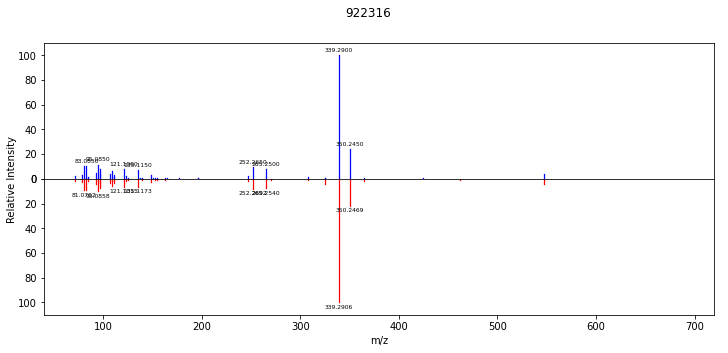

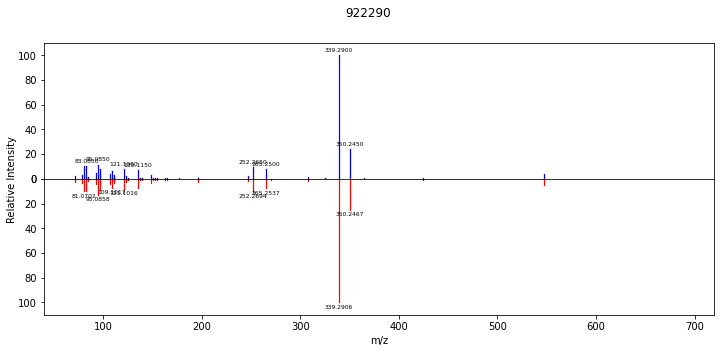

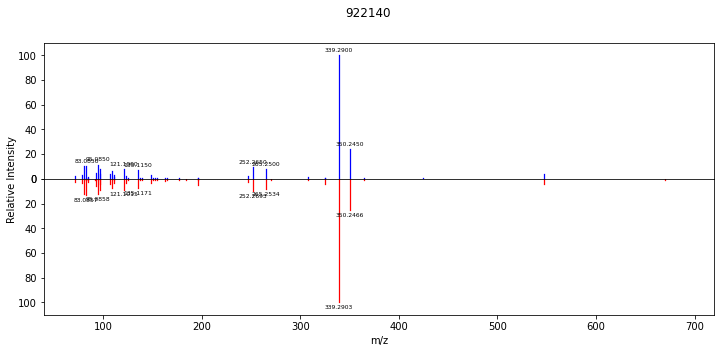

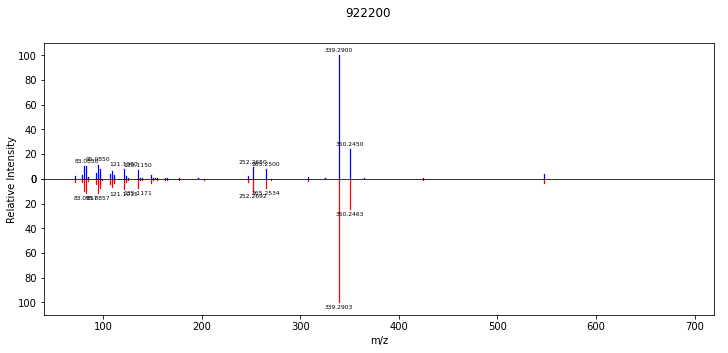

In [107]:

for member in members:


    print(member['id'])
    generate_head_tail_plot(compound=compound,member=member)

This is an overview of the similarity distribution of all members for this compoaund against the consensus spectra. The consensus spectra includes all if it's members in it!

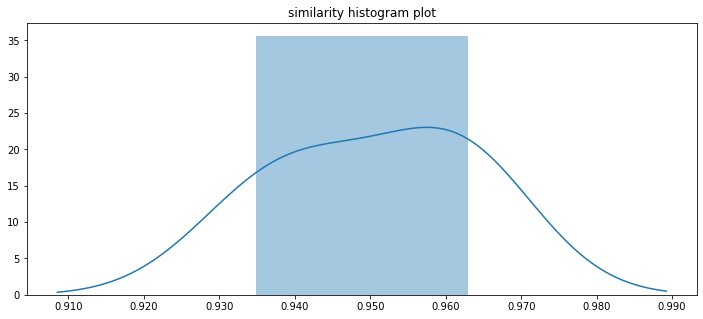

In [108]:
generate_similarity_histogram(compound,members)

Below here you can find a quick similarity search of potential identifications of this particular compound.

In [109]:
result = identify_compound(compound)
df = pd.DataFrame(result)

if 'spectrum' in df.columns:
    df = df.drop(['spectrum'],axis=1)
else:
    print("sorry no similarity hits found!")

sorry no similarity hits found!


In [110]:
df

""


In [111]:
df

""


In [112]:
df

""


In [113]:
df

""


In [114]:
df

""
